# Tutorial for MUR SST on AWS  

- Funding: Interagency Implementation and Advanced Concepts Team [IMPACT](https://earthdata.nasa.gov/esds/impact) for the Earth Science Data Systems (ESDS) program and AWS Public Dataset Program

Credits: Tutorial development
* [Dr. Chelle Gentemann](mailto:gentemann@faralloninstitute.org) -  [Twitter](https://twitter.com/ChelleGentemann)   - Farallon Institute
* [Dr. Rich Signell](mailto:rsignell@usgs.gov) - [Twitter](https://twitter.com/rsignell) - USGS
* [Dr. Ryan Abernathey](mailto:rpa@ldeo.columbia.edu) - [Twitter](https://twitter.com/rabernat) - LDEO


Credits: Creating of the Zarr MUR SST dataset.  

* [Aimee Barciauskas](mailto:aimee@developmentseed.org) - [Twitter](https://twitter.com/_aimeeb) - Development Seed
* [Dr. Rich Signell](mailto:rsignell@usgs.gov) - [Twitter](https://twitter.com/rsignell) - USGS
* [Dr. Chelle Gentemann](mailto:gentemann@faralloninstitute.org)  -  [Twitter](https://twitter.com/ChelleGentemann) - Farallon Institute
* [Joseph Flasher](mailto:jflasher@amazon.com) [Twitter](https://twitter.com/joseph_flasher) - AWS

Credits: Tutorial review and comments.
* [Dr. Ed Armstrong](mailto:edward.m.armstrong@jpl.nasa.gov) - JPL PODAAC

-------------

## Please note that this is global, 1 km, daily data.  This is a very large dataset and the analyses below can take up to 5-10 minutes

## [MUR SST](https://podaac.jpl.nasa.gov/Multi-scale_Ultra-high_Resolution_MUR-SST) [AWS Public dataset program](https://registry.opendata.aws/mur/) 

### This Pangeo binder is faster when run on AWS.  

![image](https://podaac.jpl.nasa.gov/Podaac/thumbnails/MUR-JPL-L4-GLOB-v4.1.jpg)

This code shows how to read from a s3 bucket.  
Right now (2/16/2020) this takes ~1min on AWS and ~2 min on google cloud, there are couple issues here and we are working to solve both.  
1. Some shortcomings in the s3fs and zarr formats have been identified.  To work on these, git issues were raised to the developers [here](https://github.com/dask/s3fs/issues/285) and [here](https://github.com/zarr-developers/zarr-python/issues/536)


# To run this notebook

Code is in the cells that have <span style="color: blue;">In [  ]:</span> to the left of the cell and have a colored background

To run the code:
- option 1) click anywhere in the cell, then hold shift and press Enter
- option 2) click on the Run button at the top of the page in the dashboard

# Structure of this tutorial

1. Opening data
2. Data exploration



# 1. Opening data



-------------------

## Import python packages

It is nice to turn off warnings and set xarray display options.  

In [1]:
import warnings
import numpy as np
import pandas as pd
import xarray as xr
import fsspec

warnings.simplefilter('ignore') # filter some warning messages
xr.set_options(display_style="html")  #display dataset nicely 

### Start a cluster, a group of computers that will work together.

(A cluster is the key to big data analysis on on Cloud.)

- This will set up a [dask kubernetes](https://docs.dask.org/en/latest/setup/kubernetes.html) cluster for your analysis and give you a path that you can paste into the top of the Dask dashboard to visualize parts of your cluster.  
- You don't need to paste the link below into the Dask dashboard for this to work, but it will help you visualize progress.
- Try 20 workers to start (during the tutorial) but you can increase to speed things up later

In [2]:
from dask_gateway import Gateway
from dask.distributed import Client

In [3]:
gateway = Gateway()
cluster = gateway.new_cluster(worker_memory=16)
cluster.adapt(minimum=1, maximum=20)
client = Client(cluster)
cluster

** ☝️ Don’t forget to click the link above or copy it to the Dask dashboard 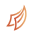 on the left to view the scheduler dashboard! **

### Initialize Dataset

Here we load the dataset from the zarr store. Note that this very large dataset initializes nearly instantly, and we can see the full list of variables and coordinates.

### Examine Metadata

For those unfamiliar with this dataset, the variable metadata is very helpful for understanding what the variables actually represent
Printing the dataset will show you the dimensions, coordinates, and data variables with clickable icons at the end that show more metadata and size.

In [4]:
%%time

ds_sst = xr.open_zarr('https://mur-sst.s3.us-west-2.amazonaws.com/zarr-v1',consolidated=True)

ds_sst

CPU times: user 1.88 s, sys: 133 ms, total: 2.01 s
Wall time: 3.43 s


<xarray.Dataset>
Dimensions:           (lat: 17999, lon: 36000, time: 6443)
Coordinates:
  * lat               (lat) float32 -89.99 -89.98 -89.97 ... 89.97 89.98 89.99
  * lon               (lon) float32 -179.99 -179.98 -179.97 ... 179.99 180.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 dask.array<chunksize=(5, 1799, 3600), meta=np.ndarray>
    analysis_error    (time, lat, lon) float32 dask.array<chunksize=(5, 1799, 3600), meta=np.ndarray>
    mask              (time, lat, lon) float32 dask.array<chunksize=(5, 1799, 3600), meta=np.ndarray>
    sea_ice_fraction  (time, lat, lon) float32 dask.array<chunksize=(5, 1799, 3600), meta=np.ndarray>
Attributes:
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    creator_name:               JPL MUR SST project
    creator_url:                http://mur.jpl.nasa.gov
    date_created:               20200124T010755Z
    easternmost_longitude:      180.0
    file_quality_level:         3
    gds_version_id:             2.0
    geospatial_lat_resolution:  0.009999999776482582
    geospatial_lat_units:       degrees north
    geospatial_lon_resolution:  0.009999999776482582
    geospatial_lon_units:       degrees east
    history:                    created at nominal 4-day latency; replaced nr...
    id:                         MUR-JPL-L4-GLOB-v04.1
    institution:                Jet Propulsion Laboratory
    keywords:                   Oceans > Ocean Temperature > Sea Surface Temp...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    license:                    These data are available free of charge under...
    metadata_link:              http://podaac.jpl.nasa.gov/ws/metadata/datase...
    naming_authority:           org.ghrsst
    netcdf_version_id:          4.1
    northernmost_latitude:      90.0
    platform:                   Terra, Aqua, GCOM-W, MetOp-A, MetOp-B, Buoys/...
    processing_level:           L4
    product_version:            04.1
    project:                    NASA Making Earth Science Data Records for Us...
    publisher_email:            ghrsst-po@nceo.ac.uk
    publisher_name:             GHRSST Project Office
    publisher_url:              http://www.ghrsst.org
    references:                 http://podaac.jpl.nasa.gov/Multi-scale_Ultra-...
    sensor:                     MODIS, AMSR2, AVHRR, in-situ
    source:                     MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRRM...
    southernmost_latitude:      -90.0
    spatial_resolution:         0.01 degrees
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    start_time:                 20200116T090000Z
    stop_time:                  20200116T090000Z
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

# 2.  Explore the data

#### Let's explore the data

- With all data, it is important to explore it and understand what is contains before doing an analysis.
- The ice mask used by MUR SST is from NSIDC and is based on satellite passive microwave estimates of sea ice concentration
- The satellite data isn't available near land, so the is no estimate of sea ice concentration near land
- For this data, it means that there are some erroneous SSTs near land, that is likely ice and this is something to be aware of.

In [5]:
%%time

sst = ds_sst['analysed_sst']

cond = (ds_sst.mask==1) & ((ds_sst.sea_ice_fraction<.15) | np.isnan(ds_sst.sea_ice_fraction))

sst_masked = ds_sst['analysed_sst'].where(cond)

sst_masked

CPU times: user 7.67 ms, sys: 3.99 ms, total: 11.7 ms
Wall time: 11.3 ms


<xarray.DataArray 'analysed_sst' (time: 6443, lat: 17999, lon: 36000)>
dask.array<where, shape=(6443, 17999, 36000), dtype=float32, chunksize=(5, 1799, 3600), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -89.99 -89.98 -89.97 -89.96 ... 89.97 89.98 89.99
  * lon      (lon) float32 -179.99 -179.98 -179.97 ... 179.98 179.99 180.0
  * time     (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-20T09:00:00
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

### Using ``.groupby`` and ``.resample``
#### Create a monthly SST anomaly dataset
- First create a monthly version of the dataset using ``.resample``.  Two nice arguments for ``.resample``: ``keep_addrs`` which keeps the metadata and ``skipna`` which ensures that only data that is always present is included
- Calculate the monthly climatology using ``.groupby``
- Calculate the anomaly 


In [6]:
%%time

#create a daily climatology and anomaly
climatology_mean = sst_masked.groupby('time.dayofyear').mean('time',keep_attrs=True,skipna=False)

sst_anomaly = sst_masked.groupby('time.dayofyear')-climatology_mean  #take out annual mean to remove trends

#create a monthly dataset, climatology, and anomaly
sst_monthly = sst_masked.resample(time='1MS').mean('time',keep_attrs=True,skipna=False)

climatology_mean_monthly = sst_monthly.groupby('time.month').mean('time',keep_attrs=True,skipna=False)

sst_anomaly_monthly = sst_monthly.groupby('time.month')-climatology_mean_monthly  #take out annual mean to remove trends

sst_anomaly

CPU times: user 13.8 s, sys: 495 ms, total: 14.3 s
Wall time: 14.2 s


<xarray.DataArray 'analysed_sst' (time: 6443, lat: 17999, lon: 36000)>
dask.array<getitem, shape=(6443, 17999, 36000), dtype=float32, chunksize=(1, 1799, 3600), chunktype=numpy.ndarray>
Coordinates:
  * lat        (lat) float32 -89.99 -89.98 -89.97 -89.96 ... 89.97 89.98 89.99
  * lon        (lon) float32 -179.99 -179.98 -179.97 ... 179.98 179.99 180.0
  * time       (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-20T09:00:00
    dayofyear  (time) int64 152 153 154 155 156 157 158 ... 14 15 16 17 18 19 20

# 3. Data plotting

``xarray`` plotting functions rely on matplotlib internally, but they make use of all available metadata to make the plotting operations more intuitive and interpretable. More plotting examples are given [here](http://xarray.pydata.org/en/stable/plotting.html)

### Here we use ``holoviews`` and ``hvplot`` for interactive graphics

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
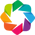

In [7]:
import hvplot.xarray
import holoviews as hv
from holoviews.operation.datashader import regrid
hv.extension('bokeh')

### Plot the SST anomaly timeseries in the Pacific Blob Region


In [8]:
%%time

daily = sst_anomaly.sel(lon=-140, lat=53).drop('dayofyear').load()

monthly = sst_anomaly_monthly.sel(lon=-140, lat=53).drop('month').load()

daily.hvplot(grid=True) * monthly.hvplot(grid=True)

CPU times: user 21.8 s, sys: 1.13 s, total: 23 s
Wall time: 7min 16s


:Overlay
   .Curve.I  :Curve   [time]   (analysed_sst)
   .Curve.II :Curve   [time]   (analysed_sst)

### Plotting on maps

For plotting on maps, we rely on the excellent [cartopy](http://scitools.org.uk/cartopy/docs/latest/index.html) library.

In [9]:
import cartopy.crs as ccrs

### Load a global image of SST on 9/1/2016

### In cartopy you need to define the map projection you want to plot.  

- Common ones are Ortographic and PlateCarree.
- You can add coastlines and gridlines to the axes as well.

### Sometimes this cell fails the first time it is run, but works the second.  Issue is discussed [here](https://github.com/dask/distributed/issues/1674)

In [11]:
%%time

sst_sept = sst_monthly.sel(time='2016-09-01').load()

(sst_sept-273.15).hvplot.quadmesh(x='lon', y='lat', geo=True, 
                         rasterize=True, clim=(0,32), 
                         cmap='turbo', 
                         projection=ccrs.Orthographic(-130, 35),
                         coastline='110m')

CPU times: user 8min 16s, sys: 4min 23s, total: 12min 40s
Wall time: 6min 19s


:DynamicMap   []
   :Overlay
      .Image.I     :Image   [lon,lat]   (analysed_sst)
      .Coastline.I :Feature   [Longitude,Latitude]

## Please close cluster

In [12]:
client.close()
cluster.close()

## A nice cartopy tutorial is [here](http://earthpy.org/tag/visualization.html)

# xarray can do more!

* concatentaion
* open network located files with openDAP
* import and export Pandas DataFrames
* .nc dump to 
* groupby_bins
* resampling and reduction

For more details, read this blog post: http://continuum.io/blog/xray-dask


## Where can I find more info?

### For more information about xarray

- Read the [online documentation](http://xarray.pydata.org/)
- Ask questions on [StackOverflow](http://stackoverflow.com/questions/tagged/python-xarray)
- View the source code and file bug reports on [GitHub](http://github.com/pydata/xarray/)

### For more doing data analysis with Python:

- Thomas Wiecki, [A modern guide to getting started with Data Science and Python](http://twiecki.github.io/blog/2014/11/18/python-for-data-science/)
- Wes McKinney, [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) (book)

### Packages building on xarray for the geophysical sciences


- [eofs](https://github.com/ajdawson/eofs): empirical orthogonal functions by Andrew Dawson
- [infinite-diff](https://github.com/spencerahill/infinite-diff) by Spencer Hill 
- [aospy](https://github.com/spencerahill/aospy) by Spencer Hill and Spencer Clark
- [regionmask](https://github.com/mathause/regionmask) by Mathias Hauser
- [salem](https://github.com/fmaussion/salem) by Fabien Maussion

Resources for teaching and learning xarray in geosciences:
- [Fabien's teaching repo](https://github.com/fmaussion/teaching): courses that combine teaching climatology and xarray
